# Problem set 2 (35 + 55 + 15 + 28 = 133 pts)

## Problem 1 (LU decomposition) 35 pts


### 1. LU for band matrices (7 pts)

The complexity to find an LU decomposition of a dense $n\times n$ matrix is $\mathcal{O}(n^3)$.
Significant reduction in complexity can be achieved if the matrix has a certain structure, e.g. it is sparse. 
In the following task we consider an important example of $LU$ for a special type of sparse matrices –– band matrices with the bandwidth $m$ equal to 3 or 5 which called tridiagonal and pentadiagonal respectively.

- (5 pts) Write a function ```band_lu(diag_broadcast, n)``` which computes LU decomposition for tridiagonal or pentadiagonal matrix with given diagonal values. 
For example, input parametres ```(diag_broadcast = [4,-2,1], n = 4)``` mean that we need to find LU decomposition for the triangular matrix of the form:

$$A = \begin{pmatrix}
-2 & 1 & 0 & 0\\
4 & -2 & 1 & 0 \\
0 & 4 & -2 & 1 \\
0 & 0 & 4 & -2 \\
\end{pmatrix}.$$

As an output it is considered to make ```L``` and ```U``` - 2D arrays representing diagonals in factors $L$ (```L[0]``` keeps first lower diagonal, ```L[1]``` keeps second lower, ...), and $U$ (```U[:,0]``` keeps main diagonal, ```U[:,1]``` keeps first upper, ...).
- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

### Consider tridiagolan:

$A = \begin{pmatrix}
a & c & 0 & 0\\
b & a & c & 0 \\
0 & b & a & c \\
0 & 0 & b & a \\
\end{pmatrix} = \begin{pmatrix}
1 & 0 & 0 & 0\\
\frac{b}{a} & 1 & 0 & 0\\
0 & \frac{b}{a - \frac{bc}{a}} & 1 & 0\\
0 & 0 & \frac{b}{a - \frac{bc}{a - \frac{bc}{a}}} & 1\\ 
\end{pmatrix} 
\begin{pmatrix}
a & c & 0 & 0 \\
0 & a - \frac{bc}{a} & c & 0 \\
0 & 0 & a - \frac{bc}{a - \frac{bc}{a}} & c \\
0 & 0 & 0 & a - \frac{bc}{a - \frac{bc}{a - \frac{bc}{a}}}\\
\end{pmatrix} = LU$

For larger matrix the same reccurent formulas for elements of L and U matrices.

In [ ]:
from scipy.sparse import diags # can be used with broadcasting of scalars if desired dimensions are large
import numpy as np
from scipy.linalg import lu

# INPUT : diag_broadcast - list of diagonals value to broadcast,length equal to 3 or 5; n - integer, band matrix shape.
# OUTPUT : L - 2D np.ndarray, L.shape[0] depends on bandwidth, L.shape[1] = n-1, do not store main diagonal, where all ones;                  add zeros to the right side of rows to handle with changing length of diagonals.
#          U - 2D np.ndarray, U.shape[0] = n, U.shape[1] depends on bandwidth;
#              add zeros to the bottom of columns to handle with changing length of diagonals.
def band_lu (diag_broadcast, n):
    if len(diag_broadcast) == 3:
      L = np.zeros(n-1)
      U = np.zeros((n,2))
      U[0,0] = diag_broadcast[1]
      U[0,1] = diag_broadcast[2]
      for i in range (1,n):
        if U[i-1,0] == 0:
          raise Exception('Need pivoting')
        else :
          L[i-1] = diag_broadcast[0]/U[i-1,0]
          U[i,0] =  diag_broadcast[1] - diag_broadcast[2]*L[i-1]
          U[i,1] = diag_broadcast[2]
      
    if len(diag_broadcast) == 5:
      U = np.zeros((n, 3))
      L = np.zeros((n-1, 2), dtype=float)
      U[0, 0] = diag_broadcast[2]
      U[0, 1] = diag_broadcast[3]
      U[0, 2] = diag_broadcast[4]
      L[0, 0] = diag_broadcast[1]/diag_broadcast[2]
      U[1, 0] = diag_broadcast[2] - U[0, 1]*L[0, 0]
      for i in range(1, n-1):
         if U[i,0] == 0:
            raise Exception('Need pivoting')
         U[i, 2] = diag_broadcast[4]
         L[i-1,1] = diag_broadcast[0]/U[i-1, 0]
         U[i, 1] = diag_broadcast[3] - diag_broadcast[4]*L[i-1, 0]
         L[i, 0] = (diag_broadcast[1] - L[i-1, 1]*U[i-1, 1])/U[i, 0]
         U[i+1, 0] = diag_broadcast[2] - diag_broadcast[4] * L[i-1, 1] - L[i, 0]*U[i, 1]

    return L, U

In [ ]:
def sci_lu(diag_broadcast, n):
    if len(diag_broadcast) == 3:
        #diagonals = np.array([[diag_broadcast[0] for i in range (n-1)], [diag_broadcast[1] for i in range (n)],
        #      [diag_broadcast[2] for i in range (n-1)]])
        A = diags(diag_broadcast, [-1, 0, 1], shape=(n, n)).toarray()
        
    else: 
        #diagonals = np.array([[diag_broadcast[0] for i in range (n-2)], [diag_broadcast[1] for i in range (n-1)],
        #      [diag_broadcast[2] for i in range (n)], [diag_broadcast[3] for i in range (n-1)],[diag_broadcast[4] for i in range (n-2)]])
        A = diags(diag_broadcast, [-2,-1, 0, 1,2], shape=(n, n)).toarray()      

    return lu(A)

In [ ]:
diag_broadcast = np.random.rand(5)
n = 4

In [ ]:
L,U = band_lu (diag_broadcast, n)

In [ ]:
P,L_s,U_s = lu(sci_lu (diag_broadcast, n))

In [ ]:
# for 3-diagonal
if len(diag_broadcast) == 3:
  diagonals = np.array([L, [1 for i in range (n)]])
  L_big = diags(diagonals, [-1, 0]).toarray()
  diagonals = np.array([U[:,0],U[:,-1]])
  U_big = diags(diagonals, [0, 1]).toarray()
else:
# for 5-diagonal
  diagonals = np.array([L[:,0],L[:,1], [1 for i in range (n)]])
  L_big = diags(diagonals, [-1,-2,0]).toarray()
  diagonals = np.array([U[:,0],U[:-1,1], U[:-2,2]])
  U_big = diags(diagonals, [0, 1,2]).toarray()

In [ ]:
# Check, if we find correc LU
print(np.allclose(sci_lu(diag_broadcast, n),L_big.dot(U_big)))

True


- (2 pts) Compare execution time of the band LU decomposition using standard function from ```scipy```, i.e. which takes the whole matrix and does not know about its special structure, and band decomposition of yours implementation. Comment on the results.

In [ ]:
time_sci = []
time_band = []
for i in range (10,500,50):
  diag_broadcast = np.random.rand(5)
  n = i
  t1 = %timeit -o -q lu(np.eye(i, i, k=-2) * (diag_broadcast[0]) + np.eye(i, i, k=-1) * (diag_broadcast[1]) + np.eye(i, i, k=0) * (diag_broadcast[2]) + np.eye(i, i, k=1) * (diag_broadcast[3]) + np.eye(i, i, k = 2) * (diag_broadcast[4]))
  time_sci.append(t1.best)
  t2 = %timeit -o -q band_lu(diag_broadcast, n)
  time_band.append(t2.best)


In [ ]:
time_sci_3 = []
time_band_3 = []
for i in range (10,500,50):
  diag_broadcast = np.random.rand(3)
  n = i
  t1 = %timeit -o -q (sci_lu (diag_broadcast, n))
  time_sci_3.append(t1.best)
  t2 = %timeit -o -q band_lu(diag_broadcast, n)
  time_band_3.append(t2.best)


Text(0.5, 1.0, 'For 3-diagonal matrix')

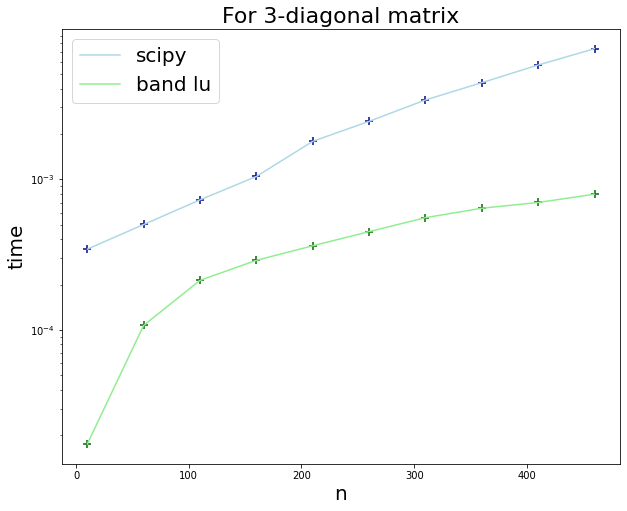

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
dim = np.arange(10,500,50)
plt.plot(dim, time_sci_3, label = 'scipy',c = 'lightblue')
plt.scatter(dim, time_sci_3, marker = '+',s = 62, c = 'darkblue')
plt.plot(dim, time_band_3, label = 'band lu', c = 'lightgreen')
plt.scatter(dim, time_band_3, marker = '+',s = 62, c = 'darkgreen')
plt.xlabel ('n',fontsize=20)
plt.ylabel('time',fontsize=20)
plt.legend(fontsize=20)
plt.yscale("log")
plt.title('For 3-diagonal matrix',fontsize=22)



Text(0.5, 1.0, 'For 5-diagonal matrix')

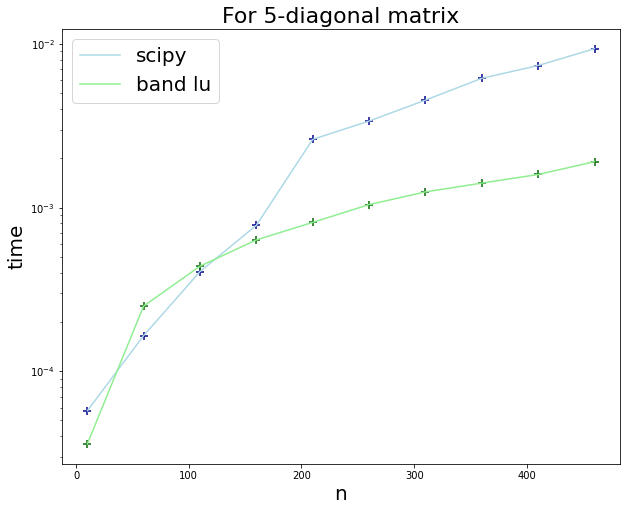

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
dim = np.arange(10,500,50)
plt.plot(dim, time_sci, label = 'scipy',c = 'lightblue')
plt.scatter(dim, time_sci, marker = '+',s = 62, c = 'darkblue')
plt.plot(dim, time_band, label = 'band lu', c = 'lightgreen')
plt.scatter(dim, time_band, marker = '+',s = 62, c = 'darkgreen')
plt.xlabel ('n',fontsize=20)
plt.ylabel('time',fontsize=20)
plt.legend(fontsize=20)
plt.yscale("log")
plt.title('For 5-diagonal matrix',fontsize=22)


### 2. Stability of LU (8 pts)

Let
$A = \begin{pmatrix}
\varepsilon & 1 & 0\\
1 & 1 & 1 \\
0 & 1 & 1
\end{pmatrix}.$ 
* (5 pts) Find analytically LU decomposition with and without pivoting for the matrix $A$.
* (3 pts) Explain, why can the LU decomposition fail to approximate factors $L$ and $U$ for $|\varepsilon|\ll 1$ in computer arithmetic?

* (5 pts) Find analytically LU decomposition with and without pivoting for the matrix $A$

  -  without pivotiong

  $A = \begin{pmatrix}
  \varepsilon & 1 & 0\\
  1 & 1 & 1 \\
  0 & 1 & 1
  \end{pmatrix} = \begin{pmatrix}
  1 & 0 & 0\\
  \frac{1}{\epsilon}& 1 & 0\\
  0& \frac{1}{1 - \frac{1}{\epsilon}}& 1
  \end{pmatrix} \begin{pmatrix}
  \epsilon & 1 & 0\\
  0 & 1 - \frac{1}{\epsilon} & 1\\
  0 & 0 & 1 - \frac{1}{1 - \frac{1}{\epsilon}}
  \end{pmatrix} =  LU$

  - with pivoting

  1) $A_0 = \begin{pmatrix}
  1 & 1 & 1 \\
  \epsilon & 1 & 0\\
  0 & 1 & 1
  \end{pmatrix}\\ 
  L_0 = \begin{pmatrix}
  1 & 0 & 0\\
  \epsilon & 1 & 0\\
  0 & * & 1
  \end{pmatrix}\\
  U_0 = \begin{pmatrix}
  1 & 1 & 1\\
  0 & 1 - \epsilon & - \epsilon\\
  0 & 1 & 1
  \end{pmatrix}$

  2)  $U_{01} = \begin{pmatrix}
  1 & 1 & 1\\
  0 & 1 & 1 \\
  0 & 1 - \epsilon & - \epsilon
  \end{pmatrix}$

  $L_1 = \begin{pmatrix}
  1 & 0 & 0\\
  0 & 1 & 0\\
  \epsilon & 1-\epsilon& 1
  \end{pmatrix}\\
  U_1 = \begin{pmatrix}
  1 & 1 & 1\\
  0 & 1  & 1\\
  0 & 0 & -1
  \end{pmatrix}$

  $A = \begin{pmatrix}
  0 & 0 & 1\\
  1 & 0 & 0\\
  0 & 1 & 0
  \end{pmatrix}
  \begin{pmatrix}
  1 & 0 & 0\\
  0 & 1 & 0\\
  \epsilon & 1-\epsilon& 1
  \end{pmatrix} \begin{pmatrix}
  1 & 1 & 1\\
  0 & 1  & 1\\
  0 & 0 & -1
  \end{pmatrix} = PLU$

* (3 pts) Explain, why can the LU decomposition fail to approximate factors $L$ and $U$ for $|\varepsilon|\ll 1$ in computer arithmetic?

  Considereng $|\epsilon| \ll 1$ we will have overflow to $\infty$ of $\frac{1}{\epsilon}$

### 3. Block LU (10 pts)

Let $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix}$ be a block matrix. The goal is to solve the linear system

$$
     \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} \begin{bmatrix} u_1 \\ u_2 \end{bmatrix} = \begin{bmatrix} f_1 \\ f_2 \end{bmatrix}.
$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ is called <font color='red'> Schur complement </font> of the block $A_{11}$.
* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.
* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

* (2 pts) Using block elimination find matrix $S$ and right-hand side $\hat{f_2}$ so that $u_2$ can be found from $S u_2 = \hat{f_2}$. Note that the matrix $S$ 

1) $A_{11} u_1 + A_{21} u_2 = f_1$

2) $A_{21} u_1 + A_{22} u_2 = f_2$

3) From 1) $\Rightarrow u_1 = A_{11}^{-1}(f_1 - A_{21}u_2)$

4) From 2) and 3)  $\Rightarrow A_{21}A_{11}^{-1}(f_1 - A_{21}u_2) + A_{22}u_2 = f_2 \rightarrow (-A_{21}A_{11}^{-1}A_{21} + A_{22})u_2 = f_2 - A_{21}A_{11}^{-1}f_1$

$\hat{f_2} = f_2 - A_{21}A_{11}^{-1}f_1$

$S = -A_{21}A_{11}^{-1}A_{21} + A_{22}$

* (4 pts) Using Schur complement properties prove that 

$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$


where $X$ - nonsingular square matrix.

 $A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} = \begin{bmatrix} X & A \\ -B & I \end{bmatrix} $

$ S = BX^{-1}A + I$

$A =  \begin{bmatrix} I & 0 \\ -BX^{-1} & I \end{bmatrix}  \begin{bmatrix} X & A \\ 0 & S \end{bmatrix} = \begin{bmatrix} X & 0 \\ -B & I \end{bmatrix} \begin{bmatrix} I& X^{-1}A\\ 0 & S \end{bmatrix}$

$det (A) = det(\begin{bmatrix} X & A \\ -B & I \end{bmatrix}) = det (\begin{bmatrix} X & 0 \\ -B & I \end{bmatrix})det(\begin{bmatrix} I& X^{-1}A\\ 0 & S \end{bmatrix}) \Rightarrow \\
det(X + AB) = det(X)*det(S) = det(X)det(BX^{-1}A + I)$

* (4 pts) Let matrix $F \in \mathbb{R}^{m \times n}$ and $G \in \mathbb{R}^{n \times m}$. Prove that 

$$\det(I_m - FG) = \det(I_n - GF).$$

From the exercise above:$$\det(X+AB) = \det(X)\det(I+BX^{-1}A), $$

Let's take $X = I_m$, $A = -F$ and $B = G$, then $I_m + (GI_n^{-1}(-F)) = I_m - GF$

and $$\det(I_m - FG) = \det(I_n - GF).$$


### 4. Efficient implementation of LU decomposition (10 pts)

In the lecture we provide naive implementation of LU factorization with loops and elementwise update of factors. In this subproblem we ask you to provide more efficient implementation of LU factorization and explain how you derive this implementation (main ideas and how you use them in this particular case). 
- (1 pts) Main idea for speed up computation of LU factorization (without using built-in function!) 
- (4 pts) Implement the presented approach to speed up LU 
- (1 pts) Illustrate numerically that your implementation is correct
- (2 pts) Provide the comparison of running time of naive implementation from the lecture, your implementation and NumPy built-in function for range of matrix dimensions. We expect you plot the running time vs matrix dimension for these implementations. So you should get the plot with three lines.
- (2 pts) Discuss the obtained results and explain what other tricks are possible to accelerate computing the LU factorization. 

NumPy or JAX are both ok in this subproblem, but please use the single library for all implementations. 

In this task we can use block LU factorization:

$A = \begin{bmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{bmatrix} = \begin{bmatrix} L_{11} & 0 \\ L_{21} & L_{22} \end{bmatrix} \begin{bmatrix} U_{11} & U_{12} \\ 0 & U_{22} \end{bmatrix} $

$A_{11} = L_{11}U_{11}$ and  $A_{21} = L_{21}U_{11}$

$A_{12} = L_{11}U_{12}$ and $A_{22} = L_{21}U_{12} + L_{22}U_{22}$

In [32]:
import jax.numpy as jnp
import jax
from jax.config import config
config.update("jax_enable_x64", True)

In [33]:
def naive_LU (a):
    a = jnp.array(a)
    #a0 = a.copy()
    n = a.shape[0]
    L = jnp.zeros((n, n))
    U = jnp.zeros((n, n))
    for k in range(n): #Eliminate one row   
        L = jax.ops.index_update(L, jax.ops.index[k, k], 1)
        for i in range(k+1, n):
            L = jax.ops.index_update(L, jax.ops.index[i, k], a[i, k] / a[k, k])
            for j in range(k+1, n):
                a = jax.ops.index_add(a, jax.ops.index[i, j], -L[i, k] * a[k, j])
        for j in range(k, n):
            U = jax.ops.index_update(U, jax.ops.index[k, j], a[k, j])
    return L,U


In [56]:
def block_lu(a):
  n = a.shape[0]
  
  if n <= 4:
      L,U = naive_LU(a)
  else:
    A11 = a[0:n//2,0:n//2]
    A12 = a[0:n//2,n//2:]
    A21 = a[n//2:,0:n//2]
    A22 = a[n//2:,n//2:]
    #print(A11.shape,A12.shape,A21.shape,A22.shape)
    #First block

    L11,U11 = block_lu(A11)
    U12 = jax.numpy.linalg.inv(L11) @ (A12)
    L21 = A21 @ (jax.numpy.linalg.inv(U11))
    L22,U22 = block_lu(A22 - L21 @ (U12))
    L = jnp.block([[L11, jnp.zeros((n//2, n - n//2))],
                    [L21, L22]])
    U = jnp.block([[U11, U12],
                   [jnp.zeros((n - n//2, n//2)), U22]])
  return L, U


In [81]:
from jax import random
import numpy as np
key = random.PRNGKey(0)
A = random.uniform(key, (6,6), minval=0.0, maxval=200.0, dtype=float)



In [82]:
L, U = block_lu(A)
print('Illustrate numerically that your implementation is correct')
print(np.allclose(A,L@U))

Illustrate numerically that your implementation is correct
True


In [ ]:
from jax import random
import numpy as np
key = random.PRNGKey(0)
A = random.uniform(key, (5,5), minval=0.0, maxval=200.0, dtype=float)

L, U = block_lu(A)
print()
print(np.allclose(A,L@U))

True


In [58]:
from scipy.linalg import lu

In [59]:
time_naive = []
time_block = []
time_scipy = []
for i in range (3,30,4):
  A = random.uniform(key, (i,i), minval=0.0, maxval=200.0, dtype=float)
  t1 = %timeit -o -q naive_LU(A)
  time_naive.append(t1.best)
  t2 = %timeit -o -q block_lu(A)
  time_block.append(t2.best)
  t3 = %timeit -o -q lu(A)
  time_scipy.append(t3.best)


Text(0, 0.5, 'matrix size')

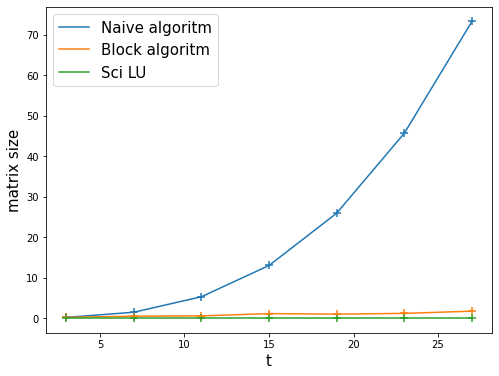

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))

plt.plot(np.arange(3,3 + len(time_naive)*4,4), np.array(time_naive), label = 'Naive algoritm')
plt.scatter(np.arange(3,3 + len(time_naive)*4,4), np.array(time_naive), marker = '+', s = 80)
plt.plot(np.arange(3,3 + len(time_block)*4,4), np.array(time_block), label = 'Block algoritm')
plt.scatter(np.arange(3,3 + len(time_block)*4,4), np.array(time_block), marker = '+', s = 80)
plt.plot(np.arange(3,3 +len(time_scipy)*4,4), np.array(time_scipy), label = 'Sci LU')
plt.scatter(np.arange(3,3 + len(time_scipy)*4,4), np.array(time_scipy), marker = '+', s = 80)
plt.legend(fontsize = 15)
plt.xlabel('t',fontsize = 15)

plt.ylabel('matrix size',fontsize = 15)

## Problem 2 (eigenvalues)  55 pts

### 1. Theoretical tasks (10 pts)


* (5 pts) Prove that normal matrix is Hermitian iff its eigenvalues are real. Prove that normal matrix is unitary iff its eigenvalues satisfy $|\lambda| = 1$. 

1) $\Rightarrow$ If normal matrix is hermitian $\rightarrow$ its eigenvalues are real. 

Hermitions matrix means: $A = A^*$ and normal - $AA^* = A^*A$

Let's consider decomposition of normal matrix A: $A = U\sum U^*$ and $A^* = (U\sum U^*)^* = U\sum^* U^* = U\sum U^* = A$ and it means, that $\sum = \sum^*$ and $\lambda_i = \lambda_i^*$ = > $\lambda_i$ are real

2) $\Leftarrow$ If normal matrix has real eigenvalues $\rightarrow$ it is hermition.

Let's consider the same decomposition as in 1): $A = U\sum U^*$ and $A^* = (U\sum U^*)^* = U\sum^* U^*$. As we know, that eigenvalues are real: $\sum = \sum^*$ and $A^* = (U\sum U^*)^* = U\sum^* U^* = U\sum U^* = A$. That's proof, that matrix is hermition $A = A^*$
 

--------------------------------------------------------------------------------------------------------------------------

Unitary matrices: $UU^* = U^*U = I$
1) $\Rightarrow$ If normal matrix is unitary $\rightarrow$ its eigenvalues satisfy $|\lambda| = 1$

As A - normal: $A = U\sum U^*$ and $AA^* = U\sum U^*U\sum^* U^* = U\sum \sum^* U^* = U diag(\lambda_i^2) U^* = I \rightarrow U^*U diag(\lambda_i^2) U^*U = U^*IU \rightarrow diag(\lambda_i^2) = I \rightarrow |\lambda| = 1$ 

2) $\Leftarrow$ If normal matrix has eigenvalues satisfy $|\lambda| = 1$  $\rightarrow$ it is unitary

As A - normal: $A = U\sum U^*$ and $AA^* = U\sum U^*U\sum^* U^* = U\sum \sum^* U^* = U diag(\lambda_i^2) U^* = UIU* = I$


* (5 pts) The following problem illustrates instability of the Jordan form. Find theoretically the eigenvalues of the perturbed Jordan block:

$$
    J(\varepsilon) = 
    \begin{bmatrix} 
     \lambda & 1 & & & 0 \\ 
     & \lambda & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda & 1 \\ 
     \varepsilon & & & & \lambda  \\ 
    \end{bmatrix}_{n\times n}
$$

Comment how eigenvalues of $J(0)$ are perturbed for large $n$.

Let's consider the charasteristic polynomial $|J(\epsilon) -  lI| = \begin{bmatrix} 
     \lambda - l & 1 & & & 0 \\ 
     & \lambda - l & 1 & & \\ 
     &  & \ddots & \ddots & \\ 
     & & & \lambda - l& 1 \\ 
     \varepsilon & & & & \lambda - l  \\ 
    \end{bmatrix}_{n\times n} = 0 \rightarrow (-1)^{n+1}\epsilon + (\lambda - l)^n \rightarrow \lambda - l = ((-1)^n\epsilon)^{1/n} \rightarrow l = \lambda - ((-1)^n\epsilon)^{1/n} \rightarrow l_k = \lambda -  |\epsilon|^{1/n}e^{i\phi_k} $
    
For large n $|\epsilon|^{1/n} \rightarrow 0$ and  $e^{i\phi_k}$ - bounded.

### 2. PageRank (35 pts)


#### Damping factor importance

* (5 pts) Write the function ```pagerank_matrix(G)``` that takes an adjacency matrix $G$ (in both sparse and dense formats) as an input and outputs the corresponding PageRank matrix $A$.

In [62]:
# INPUT:  G - np.ndarray or sparse matrix
# OUTPUT: A - np.ndarray (of size G.shape) or sparse matrix
from scipy.sparse import csr_matrix, isspmatrix
import scipy as sc
def pagerank_matrix(G):
    if sc.sparse.issparse(G):
        A = G.multiply(1/G.sum(axis = 0))
    else:
        A = G*(1/G.sum(axis = 0))
    return A

* (3 pts) Find PageRank matrix $A$ that corresponds to the following graph: <img src="graph.png" width='250'>
What is its largest eigenvalue? What multiplicity does it have?



In [63]:
G = [[0,0,1,0,0], [1,0,1,0,0],[0,1,0,0,0],[0,0,0,0,1],[0,0,0,1,0]]

In [64]:
import numpy as np
from numpy import linalg as LA

In [66]:
G = np.array(G)
A = pagerank_matrix(G)
print(A)

[[0.  0.  0.5 0.  0. ]
 [1.  0.  0.5 0.  0. ]
 [0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  1. ]
 [0.  0.  0.  1.  0. ]]


In [67]:
print('All eigenvalues', LA.eig(A)[0])
print('Max eigenvalue ', max(abs(LA.eig(A)[0])), 'with multiplicity - 2')

All eigenvalues [-0.5+0.5j -0.5-0.5j  1. +0.j   1. +0.j  -1. +0.j ]
Max eigenvalue  1.0000000000000004 with multiplicity - 2



* (5 pts) Implement the power method for a given matrix $A$, an initial guess $x_0$ and a number of iterations ```num_iter```. It should be organized as a function ```power_method(A, x0, num_iter)``` that outputs approximation to eigenvector $x$, eigenvalue $\lambda$ and history of residuals $\{\|Ax_k - \lambda_k x_k\|_2\}$. Make sure that the method converges to the correct solution on a matrix $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$ which is known to have the largest eigenvalue equal to $3$.

In [ ]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])

def power_method(A, x0, num_iter): # 5 pts
    resid = []
    x0 = x0/LA.norm(x0)
    for i in range (num_iter):
        x = A @ x0
        x = x/LA.norm(x)
        l = (A @ x).dot(x)
        res = LA.norm(A @ x - l * x)
        resid.append(res)
        if res == 0:
            break
        x0 = x
    return x, l, res, resid

* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 

$\textbf{Explain the absence of convergence.}$

The convergence ratio of power method is $q^k$ where $q = |\frac{\lambda_2}{\lambda_1}|$ and as we have $\lambda_2 = -\lambda_1$ we don't have a convergence.

In [70]:
G = [[0,0,1,0,0], [1,0,1,0,0],[0,1,0,0,0],[0,0,0,0,1],[0,0,0,1,0]]
x0 = np.random.rand(A.shape[1])
num_iter = 100
A = pagerank_matrix(np.array(G))

x, l, res, resid = power_method(A, x0, num_iter)

All eigenvalues [-0.5+0.5j -0.5-0.5j  1. +0.j   1. +0.j  -1. +0.j ]


Text(0, 0.5, 'Residial')

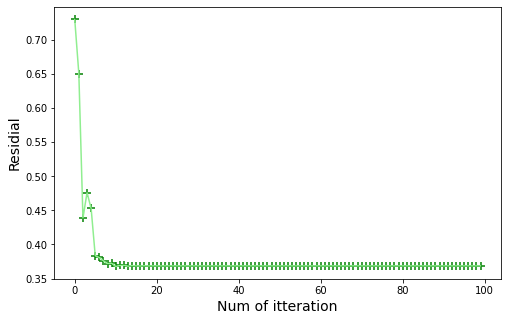

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(resid, color = 'lightgreen')
plt.scatter(np.arange(len(resid)),resid, marker = '+', s = 60, color = 'green')
plt.xlabel('Num of itteration', fontsize=14)
plt.ylabel('Residial',  fontsize=14)


* (2 pts) Consider the same graph, but with additional self loop at node 4 (self loop is an edge that connects a vertex with itself). Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?


In [71]:
num_iter = 100
G = [[0,0,1,0,0], [1,0,1,0,0],[0,1,0,0,0],[0,0,0,0,1],[0,0,0,1,1]]
A = pagerank_matrix(np.array(G))

print('All eigenvalues', LA.eig(A)[0])

All eigenvalues [-0.5+0.5j -0.5-0.5j  1. +0.j  -0.5+0.j   1. +0.j ]


In [ ]:
x, l, res, resid = power_method(A, x0, num_iter)

Text(0, 0.5, 'Residial')

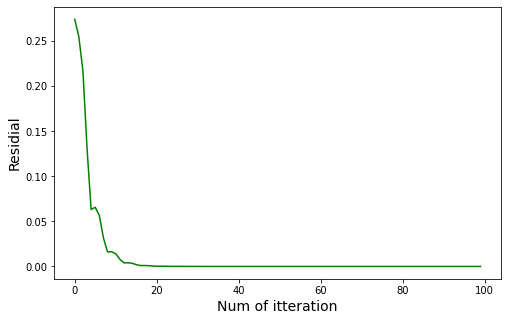

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(resid, color = 'green')
plt.xlabel('Num of itteration', fontsize=14)
plt.ylabel('Residial',  fontsize=14)


In [ ]:
for i in range (10):
    x0 = np.random.normal(size=A.shape[1])
    x, l, res, resid = power_method(A, x0, num_iter)
    print(x)

[ 0.24783396  0.49566792  0.49566792 -0.29906686 -0.59813373]
[0.30684353 0.61368705 0.61368705 0.17471317 0.34942634]
[-0.30139203 -0.60278407 -0.60278407 -0.19103171 -0.38206343]
[ 0.13491059  0.26982119  0.26982119 -0.40894796 -0.81789593]
[ 0.23407717  0.46815434  0.46815434 -0.31839312 -0.63678624]
[ 0.33096994  0.66193987  0.66193987 -0.05316035 -0.1063207 ]
[-0.12821958 -0.25643916 -0.25643916  0.41280447  0.82560894]
[-0.20876866 -0.41753731 -0.41753731  0.34863759  0.69727517]
[ 0.00790749  0.01581498  0.01581498 -0.44708774 -0.89417548]
[ 0.02190676  0.04381351  0.04381351 -0.44624676 -0.89249352]


$\textbf{Why do they depend on the initial guess?}$ 

As we have 2 equal largest eigenvalues - we will have eigenvecor that is linear combination of corresponding eigenvectors $\Rightarrow$ we have dependency on the initial guess.



In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.

In [ ]:
d = 0.97
Ones = np.ones((A.shape[0], A.shape[1]))
A_d = d*A + (1-d)/A.shape[0] * Ones
for i in range (10):
    x0 = np.random.rand(A.shape[1])
    x, l, res, resid = power_method(A_d, x0, num_iter)
    print(x)

[0.2635166  0.51920812 0.51665246 0.28419052 0.55972128]
[0.2639228  0.52002053 0.51746487 0.28351336 0.55836698]
[0.26524473 0.5226646  0.520109   0.28129058 0.55392165]
[0.25969353 0.51156339 0.50900818 0.29043291 0.57220762]
[0.25588705 0.50395425 0.50140029 0.29642394 0.58419391]
[0.26044944 0.51307474 0.51051937 0.28921701 0.5697753 ]
[0.26129404 0.51476351 0.51220802 0.28784789 0.56703659]
[0.2627393  0.51765361 0.51509797 0.28547872 0.56229777]
[0.2604195  0.51301486 0.5104595  0.28926536 0.569872  ]
[0.25887965 0.50993625 0.50738124 0.2917322  0.57480688]


* (2 pts) Run the power method for the graph presented above and plot residuals $\|Ax_k - \lambda_k x_k\|_2$ as a function of $k$ for ```num_iter=100``` and random initial guess ```x0```.  Explain the absence of convergence. 


* (2 pts) Consider the same graph, but with additional self loop at node 4 (self loop is an edge that connects a vertex with itself). Plot residuals as in the previous task and discuss the convergence. Now, run the power method with ```num_iter=100``` for 10 different initial guesses and print/plot the resulting approximated eigenvectors. Why do they depend on the initial guess?


In order to avoid this problem Larry Page and Sergey Brin [proposed](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) to use the following regularization technique:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

where $d$ is a small parameter in $[0,1]$ (typically $d=0.85$), which is called **damping factor**, $A$ is of size $N\times N$. Now $A_d$ is the matrix with multiplicity of the largest eigenvalue equal to 1. 
Recall that computing the eigenvector of the PageRank matrix, which corresponds to the largest eigenvalue, has the following interpretation. Consider a person who stays in a random node of a graph (i.e. opens a random web page); at each step s/he follows one of the outcoming edges uniformly at random (i.e. opens one of the links). So the person randomly walks through the graph and the eigenvector we are looking for is exactly his/her stationary distribution â€” for each node it tells you the probability of visiting this particular node. Therefore, if the person has started from a part of the graph which is not connected with the other part, he will never get there.  In the regularized model, the person at each step follows one of the outcoming links with probability $d$ OR teleports to a random node from the whole graph with probability $(1-d)$.

* (2 pts) Now, run the power method with $A_d$ and plot residuals $\|A_d x_k - \lambda_k x_k\|_2$ as a function of $k$ for $d=0.97$, ```num_iter=100``` and a random initial guess ```x0```.

* (5 pts) Find the second largest in the absolute value eigenvalue of the obtained matrix $A_d$. How and why is it connected to the damping factor $d$? What is the convergence rate of the PageRank algorithm when using damping factor?

Usually, graphs that arise in various areas are sparse (social, web, road networks, etc.) and, thus, computation of a matrix-vector product for corresponding PageRank matrix $A$ is much cheaper than $\mathcal{O}(N^2)$. However, if $A_d$ is calculated directly, it becomes dense and, therefore, $\mathcal{O}(N^2)$ cost grows prohibitively large for  big $N$.




In [ ]:
print(sorted(np.linalg.eigvals(A_d), reverse=True))

[(0.9999999999999999+0j), (0.9700000000000001+0j), (-0.485+0j), (-0.48500000000000015+0.48500000000000015j), (-0.48500000000000015-0.48500000000000015j)]


In [ ]:
print(sorted(abs(np.linalg.eigvals(A_d)))[-2])

0.9700000000000001


For different d 

In [80]:
d = np.array([0.4, 0.6,0.8,0.9,0.97])
Ones = np.ones((A.shape[0], A.shape[1]))
for i in range (len(d)):
    A_d = d[i]*A + (1-d[i])/A.shape[0] * Ones
    print('d: ', d[i], 'Second eigenvalue ', sorted(abs(np.linalg.eigvals(A_d)))[-2])
    print('d: ', d[i], 'Firs eigenvalue ', sorted(abs(np.linalg.eigvals(A_d)))[-1])
    

d:  0.4 Second eigenvalue  0.4000000000000003
d:  0.4 Firs eigenvalue  0.9999999999999993
d:  0.6 Second eigenvalue  0.6000000000000002
d:  0.6 Firs eigenvalue  1.0000000000000009
d:  0.8 Second eigenvalue  0.8000000000000003
d:  0.8 Firs eigenvalue  1.0000000000000007
d:  0.9 Second eigenvalue  0.8999999999999996
d:  0.9 Firs eigenvalue  0.9999999999999986
d:  0.97 Second eigenvalue  0.9700000000000001
d:  0.97 Firs eigenvalue  0.9999999999999999


$\textbf{How and why is it connected to the damping factor  d ?}$ 

$\textbf{What is the convergence rate of the PageRank algorithm when using damping factor?}$

As we got second large eigenvalue = d and the first large is 1 $\Rightarrow q = |\frac{\lambda_2}{\lambda_1}| = d$ - ratio of convergence.

* (2 pts) Implement fast matrix-vector product for $A_d$ as a function ```pagerank_matvec(A, d, x)```, which takes a PageRank matrix $A$ (in sparse format, e.g., ```csr_matrix```), damping factor $d$ and a vector $x$ as an input and returns $A_dx$ as an output. 

* (1 pts) Generate a random adjacency matrix of size $10000 \times 10000$ with only 100 non-zero elements and compare ```pagerank_matvec``` performance with direct evaluation of $A_dx$.

In [ ]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
from scipy.sparse import csr_matrix
def pagerank_matvec(A, d, x): # 2 pts
    v = x.sum()
    A_d = (d*A.dot(x) + (1-d)/A.shape[0] * v)
    return A_d

In [ ]:
n = 10000
G = sc.sparse.random(n, n, , format = 'csr')
A =  pagerank_matrix(G)
x = np.random.rand(10000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [ ]:
A.shape[0]

10000

In [ ]:
Ones = np.ones((10000,10000))

In [ ]:
%timeit (d*A + (1-d)/A.shape[0] * Ones).dot(x)

1 loop, best of 3: 375 ms per loop


In [ ]:
d = 0.97
%timeit pagerank_matvec(A, d, x)

The slowest run took 27.39 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 23.1 µs per loop


#### DBLP: computer science bibliography

Download the dataset from [here](https://goo.gl/oZVxEa), unzip it and put `dblp_authors.npz`  and `dblp_graph.npz` in the same folder with this notebook. Each value (author name) from `dblp_authors.npz` corresponds to the row/column of the matrix from `dblp_graph.npz`. Value at row `i` and column `j` of the matrix from `dblp_graph.npz` corresponds to the number of times author `i` cited papers of the author `j`. Let us now find the most significant scientists according to PageRank model over DBLP data.

* (4 pts) Load the weighted adjacency matrix and the authors list into Python using ```load_dblp(...)``` function. Print its density (fraction of nonzero elements). Find top-10 most cited authors from the weighted adjacency matrix. Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.
 
 
* (1 pts) In order to provide ```pagerank_matvec``` to your ```power_method``` (without rewriting it) for fast calculation of $A_dx$, you can create a ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Calling ```L@x``` or ```L.dot(x)``` will result in calculation of ```pagerank_matvec(A, d, x)``` and, thus, you can plug $L$ instead of the matrix $A$ in the ```power_method``` directly. **Note:** though in the previous subtask graph was very small (so you could disparage fast matvec implementation), here it is very large (but sparse), so that direct evaluation of $A_dx$ will require $\sim 10^{12}$ matrix elements to store - good luck with that (^_<).


* (2 pts) Run the power method starting from the vector of all ones and plot residuals $\|A_dx_k - \lambda_k x_k\|_2$  as a function of $k$ for $d=0.85$.


* (1 pts) Print names of the top-10 authors according to PageRank over DBLP when $d=0.85$. Comment on your findings.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/My Drive

/content/drive/My Drive


In [ ]:
from zipfile import ZipFile
zf = ZipFile('dblp.zip', 'r')
zf.extractall('dblp')
zf.close()

In [ ]:
cd dblp/

/content/drive/My Drive/dblp


In [ ]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [ ]:
print('density:', (G.count_nonzero() /(G.shape[0]*G.shape[1])))

density: 4.4986518152305776e-05


In [ ]:
from scipy.sparse import csr_matrix, find
Find = find(G)
G_sort = np.sort(Find[2])

In [ ]:
weights = G.sum(axis = 0)
for i in range (1,11):
  print(authors[np.array(weights.argsort())[0][-i]])

Scott Shenker
Andrew Zisserman
Hari Balakrishnan
Jiawei Han
Anil K. Jain
Cordelia Schmid
Jitendra Malik
Ion Stoica
David E. Culler
David G. Lowe


Now, make all the weights of the adjacency matrix equal to 1 for simplicity (consider only existence of connection between authors, not its weight). 
##Obtain the PageRank matrix $A$ from the adjacency matrix and verify that it is stochastic.

In [ ]:
G.data = np.ones(G.data.shape[0])

In [ ]:
A = pagerank_matrix(G)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys


In [ ]:
from scipy.sparse.linalg import LinearOperator
d = 0.85
L = LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))

In [ ]:
x0 = np.ones(A.shape[0])

In [ ]:
import numpy as np
from numpy import linalg as LA

In [ ]:
num_iter = 100
x, l, res, resid = power_method(L, x0, num_iter)

In [ ]:
num_iter = 300
x, l, res, resid = power_method(L, x0, num_iter)

Text(0, 0.5, 'Residial')

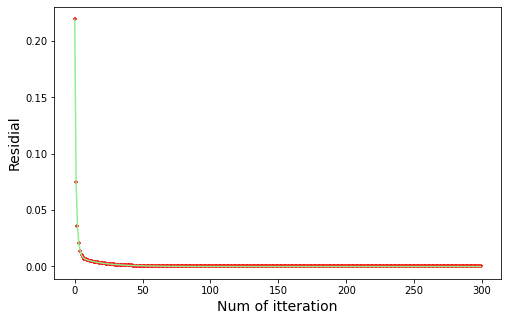

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(resid, color = 'lightgreen')
plt.scatter(np.arange(len(resid)),resid, marker = '+', s = 20, color = 'red')
plt.xlabel('Num of itteration', fontsize=14)
plt.ylabel('Residial',  fontsize=14)

In [ ]:
best = sorted(range(len(x)), reverse=True, key=lambda k: x[k])[:10]
for i in best:
    print(authors[i])

Wei Wang
Yang Liu
Wei Zhang
Wei Li
Lei Wang
Athanasios V. Vasilakos
Lei Zhang
Jun Zhang
Jun Wang
Li Li


In [ ]:
pagerank_matvec(A, d, x)

array([3.68394488e-05, 6.55298261e-05, 4.95377453e-04, ...,
       3.87770790e-05, 3.68394488e-05, 3.68394488e-05])

### 3. QR algorithm (10 pts)

* Implement QR-algorithm without shifting. Prototype of the function is given below

In [ ]:
# INPUT: 
# A_init - square matrix, 
# num_iter - number of iterations for QR algorithm
# OUTPUT: 
# Ak - transformed matrix A_init given by QR algorithm, 
# convergence - numpy array of shape (num_iter, ), 
# where we store the maximal number from the Chebyshev norm 
# of triangular part of the Ak for every iteration
def qr_algorithm(A_init, num_iter): # 3 pts
    convergence = []
    for i in range (num_iter):
      Q,R = jax.scipy.linalg.qr(A_init)
      A_k = R.dot(Q)
      A_init = A_k
      convergence.append(max(map(max, abs(np.tril(A_k,-1)))))

    
    return A_k, np.array(convergence)

#### Symmetric case (3 pts)
- Create symmetric tridiagonal $11 \times 11$ matrix with elements $-1, 2, -1$ on sub-, main- and upper diagonal respectively without using loops.
- Run $400$ iterations of the QR algorithm for this matrix.
- Plot the output matrix with function ```plt.spy(Ak, precision=1e-7)```.
- Plot convergence of QR-algorithm.

In [ ]:
import numpy as np
n = 11
m = 11
A = np.eye(m, n, k=-1) * (-1) + np.eye(m, n) * 2 + np.eye(m, n, k=1) * (-1)

In [ ]:
A

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

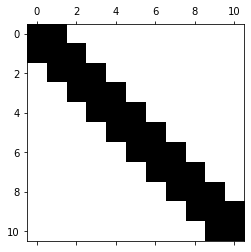

In [ ]:
import matplotlib.pyplot as plt

plt.spy(A, precision=1e-7)

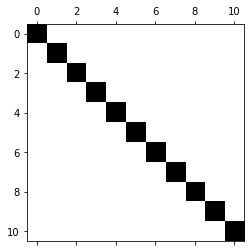

In [ ]:
A_k, conv = qr_algorithm(A, 400)
plt.spy(A_k, precision=1e-7)

Text(0.5, 1.0, 'convergence for a symetric matrix')

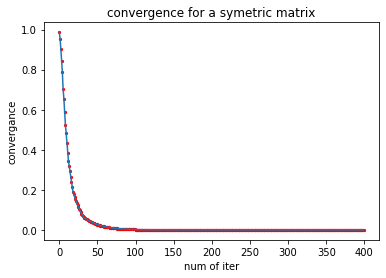

In [ ]:
plt.plot(np.arange(400),conv)
plt.scatter(np.arange(400),conv, marker = 'o',s = 5, color = 'red')
plt.xlabel('num of iter')
plt.ylabel('convergance')
plt.title('convergence for a symetric matrix')

#### Nonsymmetric case (4 pts)

- Create nonsymmetric tridiagonal $11 \times 11$ matrix with elements $5, 3, -2$ on sub-, main- and upper diagonal respectively without using loops.
- Run $250$ iterations of the QR algorithm for this matrix.
- Plot the result matrix with function ```plt.spy(Ak, precision=1e-7)```. Is this matrix lower triangular? How does this correspond to the claim about convergence of the QR algorithm?

In [ ]:
from scipy.sparse import diags
m = np.array([5,3,-2])
diag = np.array([[m[0] for i in range (10)], [m[1] for i in range (11)],[m[2] for i in range (10)]])
A = diags(diag, [-1, 0, 1]).toarray()    


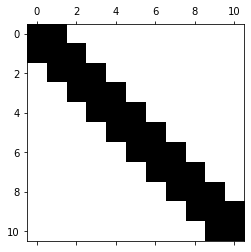

In [ ]:
plt.spy(A, precision=1e-7)

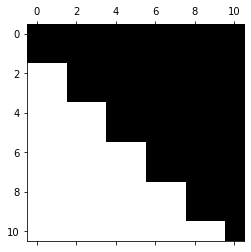

In [ ]:
A_k_nonsym, con_nonsym = qr_algorithm(A, 250)
plt.spy(A_k_nonsym, precision=1e-7)

Text(0.5, 1.0, 'convergence for a nonsymetric matrix')

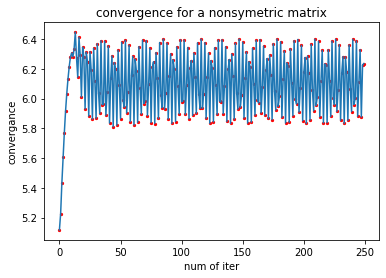

In [ ]:
plt.plot(np.arange(250), con_nonsym)
plt.scatter(np.arange(250), con_nonsym, marker = 'o',s = 5, color = 'red')
plt.xlabel('num of iter')
plt.ylabel('convergance')
plt.title('convergence for a nonsymetric matrix')

For non-symmetric case we have convergence not to upper-triangular matrix, but to block upper-triangular matrix.

## Problem 3. (Pseudo-Schur decomposition) 15 pts
Let's redefine scalar product $ \forall x, y \in \mathbb{C}^n$ in a following way:

$$ [x,y]_J = y^{*}Jx, \text{s.t.}\ J = \text{diag}(j_{11}, j_{22}, \dots, j_{nn})\ \text{and}\ j_{ii} = \pm1\ \forall i \in [1,n].$$

Denote rows of matrix $V \in \mathbb{C}^{n \times n}$ as $v_1, v_2, \dots, v_n$. Then $V$ is called $\textbf{J-orthonormal}$ iff 

$$[v_i, v_k]_J = \pm \delta_{ik}.$$

We will call matrix $T \in \mathbb{C}^{n \times n}$ $\textbf{almost triangular}$ iff $T$ is upper triangular with diagonal blocks of order $1$ or $2$.

Matrix $A \in \mathbb{C}^{n \times n}$ is said to be $\textbf{J-decomposable}$ if exist J-orthonormal matrix $V$ and upper triangular matrix $T$ such that 


$$A = V T V^{-1}.$$

Matrix $A \in \mathbb{C}^{n \times n}$ is said to have $\textbf{pseudoschur J-decomposition}$ if exist J-orthonormal matrix $V$ and almost triangular matrix $T$ such that


$$A = V T V^{-1}.$$

This problem is to get familiar with the fact that two abovementioned decompositions exist not for any square matrix with complex entries.




- (2 pts) $A$ has pseudoschur J-decomposition $A = V T V^{-1}, \ \text{where}\ V = \begin{bmatrix} v_1 & v_2 &  \ldots & v_n \end{bmatrix}, \ T = \begin{bmatrix} T_{ij} \end{bmatrix}$ and $v_1$ is $\textbf{not}$ an eigenvector of $A$. Show that $T_{21} \ne 0$. 



- (5 pts) Given $J = \text{diag}(1, -1)$ and $A = \begin{bmatrix}
3   \ -1\\
-1\   \ 3\\
\end{bmatrix}$, prove that $A$ is not J-decomposable.


- (8 pts) Given that $A \in \mathbb{C}^{n \times n}$ is diagonalizable, show that it has pseudoschur J-decomposition for any $J$ of form $J=\text{diag}(\pm 1, \dots, \pm 1)$.
Note that in order to solve that subproblem you should firstly prove the following fact:

    Let $S \in \mathbb{C}^{m \times n},\ m \ge n,\ J = \text{diag}(\pm 1).$ If $A = S^{*}JS$ and $det(A) \ne 0$, then exists QR decomposition of $S$ with respect to $J$: 
    $$S = P_1 QR P_2^{*} = P_1 Q \begin{bmatrix} R_1 \\ 0 \end{bmatrix} P_2^{*}, \ Q^{*} J^{'}Q = J^{'}, \ J^{'} = P_1^{*}JP_1,$$ where $P_1$ and $P_2$ are permutation matrices, $Q$ is called $J^{'}$- unitary and $R_1$ is almost triangular.


- (2 pts) $A$ has pseudoschur J-decomposition $A = V T V^{-1}, \ \text{where}\ V = \begin{bmatrix} v_1 & v_2 &  \ldots & v_n \end{bmatrix}, \ T = \begin{bmatrix} T_{ij} \end{bmatrix}$ and $v_1$ is $\textbf{not}$ an eigenvector of $A$. Show that $T_{21} \ne 0$.

$A = VTV^{-1} \Rightarrow AV = VT$ where $V = \begin{bmatrix} v_1 & v_2 &  \ldots & v_n \end{bmatrix}$

$T = \begin{bmatrix}
T_{11} & T_{12} & \ldots \\
T_{21} & T_{22} & \ldots \\
0 & \ldots \\
\vdots\\
0 & 0 &\ldots
\end{bmatrix}$
 
$VT = \begin{bmatrix}
v_1T_{11} + v_2T_{21}; & \ldots
\end{bmatrix}$

$AV = \begin{bmatrix}
Av_1; & \ldots
\end{bmatrix}$

$AV = VT \Rightarrow v_1T_{11} + v_2T_{21} = Av_1$

If $T_{21} = 0$ then  $v_1T_{11} + 0 = Av_1 \rightarrow Av_1 = T_{11}v_1 \rightarrow$ $v_1$ - eigenvector of matrix $A$. W (contradiction) $\Rightarrow T_{21} \ne 0$


- (5 pts) Given $J = \text{diag}(1, -1)$ and $A = \begin{bmatrix}
3   \ -1\\
-1\   \ 3\\
\end{bmatrix}$, prove that $A$ is not J-decomposable.
  

$V = \begin{bmatrix} v_1 & v_2 \end{bmatrix} = \begin{bmatrix} 
v_{11} & v_{21} \\
v_{12} & v_{22}
\end{bmatrix}$

$T = \begin{bmatrix}
T_{11} & T_{12}\\
0 & T_{22}
\end{bmatrix}$

$A = \begin{bmatrix}
3 & -1\\
-1 & 3
\end{bmatrix}$

Let's consider A - J-decomposable, that means $VT = AV \rightarrow \begin{bmatrix} 
v_{11} & v_{21} \\
v_{12} & v_{22}
\end{bmatrix}\begin{bmatrix}
T_{11} & T_{12}\\
0 & T_{22}
\end{bmatrix} = \begin{bmatrix}
3 & -1\\
-1 & 3
\end{bmatrix} \begin{bmatrix} 
v_{11} & v_{21} \\
v_{12} & v_{22}
\end{bmatrix}$

\begin{equation*}
 \begin{cases}
   v_{11}T_{11} = 3v_{11} - v_{12} & (1)\\
   v_{11}T_{12} + v_{21}T_{22} = 3v_{21} - v_{22} &(2)\\
   v_{12}T_{11} = -v_{11} +3v_{12} &(3)\\
   v_{12}T_{12}+ v_{22}T_{22} = -v_{21} +3v_{22} & (4)
 \end{cases}
\end{equation*}

$(1) - (3) = T_{11}(v_{11} - v_{12}) = 4(v_{11} - v_{12}) \rightarrow T_{11} = 4 \text {  or   } v_{11} = v_{12}$

If $T_{11} = 4 \rightarrow 4v_{11} = 3v_{11} - v_{12} \rightarrow v_{11} = -v_{12}$

But as we have $V$ - $\textbf{J-orthonormal}$

$[v_{1}, v_{1}] = v_{1}^*Jv_{1} = \pm 1$

$\begin{bmatrix} v_{11} & v_{12} \end{bmatrix} \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix} \begin{bmatrix} v_{11} \\ v_{12} \end{bmatrix} = \begin{bmatrix} v_{11}^* & -v_{12}^*\end{bmatrix}\begin{bmatrix} v_{11} \\ v_{12} \end{bmatrix}  = v_{11}^2 - v_{12}^2 = (v_{11} - v_{12})(v_{11} + v_{12}) = \pm 1 \rightarrow v_{11} \ne v_{12} \text{    and    } v_{11} \ne -v_{12} -> $ $A$ is not J-decomposable. 


In [ ]:
# Your solutuion is here

## Problem 4. (Skeleton decomposition) 28 pts

The application that we are particularly interested in is
the approximation of a given matrix by a low-rank matrix:

$$ A \approx UV^T, A \in \mathbb{R}^{m \times n}, U \in \mathbb{R}^{m \times r}, V \in \mathbb{R}^{n \times r}.$$

It is well known that the best (in any unitary invariant norm) low-rank approximation can be computed via singular value decomposition (SVD). As an alternative, we can consider skeleton decompostion of the form:

$$A \approx A_r = A(: , \mathcal{J})A(\mathcal{I} , \mathcal{J})^{-1}A(\mathcal{I} , :),$$
where $\mathcal{I,J}$ are some index sets of length $r$.

Below we consider the matrix $N \times N$ derived from the following function discretization in the uniform grid in square $[0, 1] \times [0, 1]$:
$ f(x, y) = \exp(-\sqrt{x^2 + y^2})$.
It means that $A = [a_{ij}]$, where $a_{ij} = f(x_i, x_j)$ and $x_i = i / (N-1)$, $x_j = j / (N-1)$, where $i, j = 0,\ldots, N-1$.

- (2 pts) compose this matrix for $N = 5000$ without loops (Hint: function ```np.meshgrid``` can help you)


In [1]:
import numpy as np
N = 5000
xy = np.meshgrid(np.arange(0,1.0,1/N),np.arange(0,1.00,1/N))

In [2]:
A = np.exp(-np.sqrt((xy[0]**2 + xy[1]**2)))
A

array([[1.        , 0.99980002, 0.99960008, ..., 0.36810024, 0.36802662,
        0.36795302],
       [0.99980002, 0.9997172 , 0.99955289, ..., 0.36810023, 0.36802662,
        0.36795302],
       [0.99960008, 0.99955289, 0.99943447, ..., 0.36810021, 0.36802659,
        0.36795299],
       ...,
       [0.36810024, 0.36810023, 0.36810021, ..., 0.24332311, 0.2432887 ,
        0.24325429],
       [0.36802662, 0.36802662, 0.36802659, ..., 0.2432887 , 0.2432543 ,
        0.2432199 ],
       [0.36795302, 0.36795302, 0.36795299, ..., 0.24325429, 0.2432199 ,
        0.24318551]])

In [3]:
i,j = np.unravel_index(A.argmax(), A.shape)

- (3 pts) Compute Skeleton approximation with random selection of rows and columns indices for $r = 5$ (check that submatrix in the intersection of rows and columns is nonsingular). Average the relative error $\frac{\|A - A_r \|_F}{\|A\|_F}$ over $M$ samples of column/row indices. Check that $M$ is sufficiently large to provide stable mean.

 Note: extracting submatrices should be done according to ```numpy```  e.g. ```A[index_set, :]``` to extract selected rows, ```A[:, index_set]``` to extract selected columns etc..


In [4]:
def sckeleton (A,r):
  err = []
  cond = [] 
  m = 0
  while m < 100:
      index_set_rows = np.random.choice(A.shape[0], r, replace=False)
      index_set_cols = np.random.choice(A.shape[0], r, replace=False)
      R = A[index_set_rows, :]
      C = A[:, index_set_cols]
      A_hat = R[:, index_set_cols]
      #print (jax.numpy.linalg.cond(A_hat))
      if jax.numpy.linalg.cond(A_hat) < 1e6:
        A_r = (C.dot(jax.numpy.linalg.inv(A_hat))).dot(R)
        er = jax.numpy.linalg.norm(A - A_r, ord = 'fro')/jax.numpy.linalg.norm(A, ord = 'fro')
        err.append(er)
        cond.append(jax.numpy.linalg.cond(A_hat))
        #print(er)
        m += 1
  return err,cond





In [5]:
import jax.numpy as jnp
import jax
import numpy as np
from jax.config import config
config.update("jax_enable_x64", True)

In [ ]:
err, cond = sckeleton (A,r=5)

In [ ]:
err = np.array(err)
print(err.sum()/len(err))

0.002558309849885289


As you should know from the lecture, if $A$ is of rank $r$ and $\hat{A} = A(\mathcal{I} , \mathcal{J})$ is nonsingular, then the exact equality holds. In the approximate case, however, the quality of the approximation depends on the volume of the submatrix $\hat{A}$: 

**Theorem**

*If $\hat{A} = A_{max}$ has maximal in modulus determinant among all $r \times r$ submatrices of $A$, the following error etimate holds:*

$$ \|A - A_r\|_1 \leq (r+1)\sigma_{r+1}.$$


And the question is how to choose a good submatrix of nearly maximal volume in practice.

**Definition**: *We call $r \times r$ submatrix $A_{dom}$ of rectangular $n \times r$ matrix $A$ of
full rank dominant, if all the entries of $AA_{dom}^{-1}$ are not greater than $1$ in
modulus.*

The crucial theoretical result behind the scene is that the volume of any dominant submatrix $A_{dom}$ can not be very much smaller than the maximum volume submatrix $A_{max}$ (without proof).

We provide the following algorithm for constructing dominant submatrix of a tall matrix.

**Algorithm 1**: 
    
Given matrix $A$ of size $n \times r$ finds dominant submatrix of size $r \times r$

1. Start with arbitrary nonsingular $r \times r$ submatrix $A_{dom}$. Reorder rows in $A$ so that $A_{dom}$ occupies first $r$ rows in $A$.

2. Compute $B = AA_{dom}^{-1}$ and find its maximum in module  entry $b_{ij}$.

3. **If $|b_{ij}| > 1 + \delta$, then**:

    Swap rows $i$ and $j$ in $B$ (accrodignly in A). By swapping the rows we have increased the volume of the upper submatrix in $B$, as well as in $A$ (why?). Let $A_{dom}$ be the new upper submatrix of $A$ and go to __step 1__.

    **elseif $|b_{ij}| < 1 + \delta$**:
    
    return $A_{dom}$.

Note: $\delta = 10^{-2}$ seems to be a good practical choice.

- (10 pts) Implement algorithm 1 according to the following signature, where the function returns ```row_indices``` array which can be used as ```A[row_indices, :]``` to extract selected submatrix.

Note that matrix inverse $A_{dom}^{-1}$ in step 3 has to be updated efficiently using [Shermann-Morison formula](https://en.wikipedia.org/wiki/Sherman%E2%80%93Morrison_formula) (inverse of rank-1 update).

In [42]:
def dominant_submatrix_search(A):
  r = A.shape[1]
  n = A.shape[0]
  delta = 10**(-2) 
  index_set_rows = np.random.choice(n, r, replace=False)
  A_dom = A[index_set_rows,:]
  while jax.numpy.linalg.cond(A_dom) > 1e6:
     index_set_rows = np.random.choice(n, r, replace=False)
     A_dom = A[index_set_rows,:]
  another_index_set = list(set(np.arange(n)).difference(index_set_rows)) 
  A_part = A[another_index_set, :]
  A = np.vstack((A_dom, A_part))
 
  A_dom_inv = jax.numpy.linalg.inv(A_dom)
  m = 0
  B = A.dot(A_dom_inv)
  while (1):
      
       i,j = np.unravel_index(abs(B[r+1:, :]).argmax(), B.shape)
       
       if B[i,j] > 1 + delta:
          A[[i,j]] = A[[j,i]] 

          u = np.zeros(A_dom.shape[0])
          u[j] = 1
          v = A[i]-A[j]
          
          A_dom_inv = A_dom_inv - (((A_dom_inv.dot(u)).dot(v.T)).dot(A_dom_inv))/(1 + ((v.T).dot(A_dom_inv)).dot(u))
         
          e_i = np.zeros((n,1))
          e_i[i] = 1
          e_j = np.zeros((n,1))
          e_j[j] = 1
          B = B - (B[:, j].reshape(n,1) + e_i ) @ (B[i, :].reshape(1,r) - e_j[:r].T) / B[i, j]
          index_set_rows[j] = i
          
          
       else:
         return index_set_rows
         break
     

In [43]:
for i in range (100):
  row_indices = dominant_submatrix_search(np.random.rand(5000, 10))
  print(row_indices)

[ 241 4126 3458 2725 4975  895 4276  125  469  227]
[1348 2739 3398 4869 4840 2160 4995 3782 4147 2913]
[3273 4926 1009  361 4167  424 1960  162  268 2607]
[1848 3318 2397 3853 4309 2670 2903 3987 1645 1786]
[ 131 1489 1775 1455 2471 2131 1637 1862 4766   61]
[2077  684  282 3848 2696 2018 3228 1400 1719 3602]
[4626  957 2150 4833 1387 2727  512  234 2009 1038]
[2855 2044 4904 1480   85  874 1425 4760 2610 4604]
[2246 4074 2026   93 1607 3620 2178  324  573 2641]
[  88 2385 4874 2217 1201  593 1253 4543  755 2543]
[4624 3522  657 4065 3208 2298 3304 3699 2981 4619]
[4433 4889 4570   19 3996 3087 1614 4151 2034 2598]
[3914 4483 2808 1829 3422 3258 2386 1159 3433 4173]
[4168 3205 4320  762 4049 2444 4139  793 4199 1983]
[  71 2750 1728 4416  286   12 2341 3318 1351 1178]
[1979 2703 3872 1310 3234  642 1175 3947 2334 3920]
[  41  371 4015 4564 2425  858 3549 2328 3565 4995]
[1366 3979  884 1522  896 4348 4928  146 4786 4283]
[1409 3239 3731 4450 2533 2618  403 2955 3704 1663]
[3830 2553 1

- (10 pts) Propose the method to construct Skeleton approximation using Algorithm 1. The signature of the function is provided below.  Compare your algorithm with previously considered random selection on the matrix $A$.

Hint: 

1) start with random selection of columns 

2) if you transpose the matrix for which you find rows, then Algorithm 1 will give you update for columns in the initial matrix

In [9]:
def skeleton(A,r):
    err_dom = []
    #cond = [] 
    
    index_set_cols = np.random.choice(A.shape[0], r, replace=False)
    for i in range (5):
      index_set_rows = dominant_submatrix_search(A[:, index_set_cols])[:r]
    #print(len(index_set_rows))
      index_set_cols = dominant_submatrix_search(A[index_set_rows,:].T)[:r]
    R = A[index_set_rows, :]
    C = A[:, index_set_cols]
    A_hat = R[:, index_set_cols]
    while jax.numpy.linalg.cond(A_hat) > 1e6:
      index_set_cols = np.random.choice(A.shape[0], r, replace=False)
      index_set_rows = dominant_submatrix_search(A[:, index_set_cols])[:r]
      index_set_cols = dominant_submatrix_search(A[index_set_rows,:].T)[:r]
      R = A[index_set_rows, :]
      C = A[:, index_set_cols]
      A_hat = R[:, index_set_cols]

    A_r = (C.dot(jax.numpy.linalg.inv(A_hat))).dot(R)
    er = jax.numpy.linalg.norm(A - A_r, ord = 'fro')/jax.numpy.linalg.norm(A, ord = 'fro')
    return er
    
    

- (3 pts) Compare your ```skeleton``` approximation algorithm with SVD and discuss its pros and cons.

In [ ]:
err = []
for i in range (17):
  print(i)
  A = np.exp(-np.sqrt((xy[0]**2 + xy[1]**2)))
  err.append(skeleton(A,r = 5))

In [31]:
print('skeleton',(skeleton(A,r = 5)))


skeleton 0.0005443144269320899


In [4]:
U,S,V = jnp.linalg.svd(A, full_matrices=False)
print('SVD ', np.linalg.norm(A - U * S @ V, ord='fro')/np.linalg.norm(A, ord='fro'))

SVD  1.0367214698722098e-15
